<a href="https://colab.research.google.com/github/manish-1011/RAG-using-Llama2-and-FAISS/blob/main/RAG_with_Llama2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK:
 1. Setting up enviorment
 2. upload and spilt the documnets
 3. store the embeddings in the FAISS vector DB
 4. How to setup Llama2 Model
 5. querying through RetrievalQA

#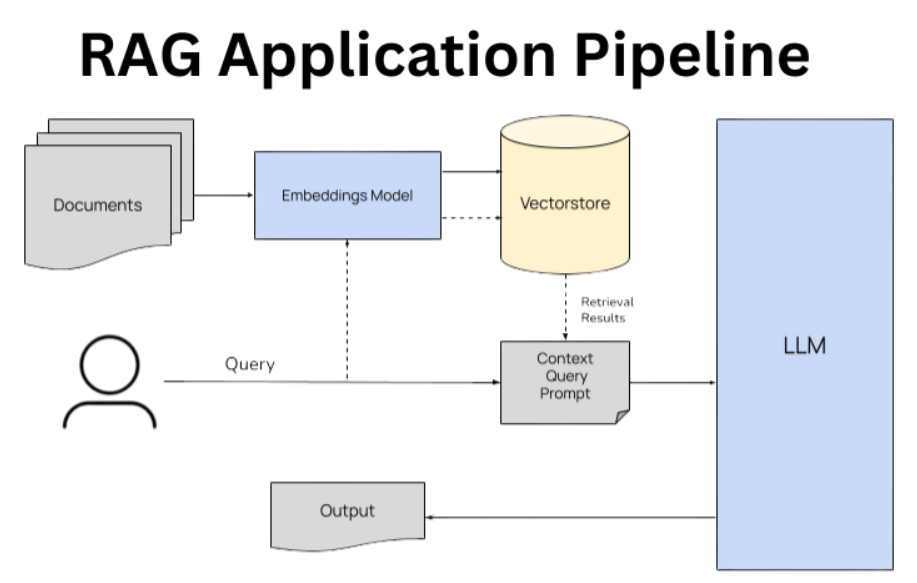 Installing the dependencies for the RAG

In [ ]:
%pip install -q -U langchain torch transformers sentence-transformers  faiss-cpu
!pip install pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 16.4 MB/s eta 0:00:00
ERROR: pip's dependency

Installing ctransformer library to use Llama 2 7B quantized model

In [ ]:
!pip install ctransformers==0.2.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 29.4 MB/s eta 0:00:00


In [ ]:
import torch
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from transformers import AutoTokenizer
from transformers import AutoTokenizer, pipeline
from langchain import HuggingFacePipeline
from langchain.chains import RetrievalQA
from langchain import PromptTemplate
from langchain.document_loaders import PyPDFDirectoryLoader


# upload the documents from which we want to ask questions

In [ ]:
from google.colab import files
import os

# Create a directory named data to save all the uploaded documents
!mkdir data
# user have to upload files
uploaded = files.upload()

for filename, content in uploaded.items():
  with open(os.path.join('data', filename), 'wb') as f:
    f.write(content)


Saving virus.pdf to virus.pdf
Saving covid 19.pdf to covid 19.pdf
Saving Human diseases.pdf to Human diseases.pdf
Saving wikipedia knowledge.pdf to wikipedia knowledge.pdf


# Data loadding and spiltting
1. Load all the data
2. Then we have to spilt all the data in small text chunks using Recursivecharacter textspiltter

In [ ]:
loader=PyPDFDirectoryLoader('data')
Data=loader.load()
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=20)
text_chunks = text_splitter.split_documents(Data)
print("The number of text chunks is :",len(text_chunks))

The number of text chunks is : 473


In [ ]:
text_chunks[102].page_content

"as 100 million people, or 5% of the world's population in 1918.[159]\nAlthough viral pandemics are rare events, HIV—which evolved from viruses found in monkeys and chimpanzees—has been pandemic since at least the\n1980s.[160] During the 20th century there were four pandemics caused by influenza virus and those that occurred in 1918, 1957 and 1968 were severe.[161]"

we are ussing the huggingface embedding model to store the embeddings of this text chunks in the vector data base

#MiniLM-l6-V2 embedding model with 384 dimensions

In [ ]:
modelPath = "sentence-transformers/all-MiniLM-l6-v2"
model_kwargs = {'device':'cpu'}
encode_kwargs = {'normalize_embeddings': False}

embeddings = HuggingFaceEmbeddings(
 model_name=modelPath,
 model_kwargs=model_kwargs,
 encode_kwargs=encode_kwargs
)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# FAISS(Facebook AI Similarity Search)

FAISS is a Vector database for efficient similarity search and clustering of multi-dimensional vectors.
It is a high-performance, open-source library that can be used to search for similar vectors in large datasets.
FAISS is particularly well-suited for large-scale applications where efficiency is critical.

In [ ]:
db = FAISS.from_documents(text_chunks, embeddings)

In [ ]:
question = "What is disease?"
searchDocs = db.similarity_search(question)
print(searchDocs[0].page_content)
print("\n")
print(searchDocs[0].metadata)


Disease
The term disease broadly refers to any condition that impairs the normal functioning of the body. For this reason, diseases are associated with the dysfunction of
the body's normal homeostatic processes.[5] Commonly, the term is used to refer specifically to infectious diseases, which are clinically evident diseases that
result from the presence of pathogenic microbial agents, including viruses, bacteria, fungi, protozoa, multicellular organisms, and aberrant proteins known as


{'source': '/content/data/wikipedia knowledge.pdf', 'page': 0}


In [ ]:
question = "What is virus?"
searchDocs = db.similarity_search(question)
for item in searchDocs:
  print(item.page_content)
  print(item.metadata)
  print("\n")

When infected, a host cell is often forced to rapidly produce thousands of copies of the original virus. When not inside an infected cell or in the process of
infecting a cell, viruses exist in the form of independent viral particles, or virions, consisting of (i) genetic material, i.e., long molecules of DNA or RNA that
encode the structure of the proteins by which the virus acts; (ii) a protein coat, the capsid, which surrounds and protects the genetic material; and in some cases
{'source': '/content/data/virus.pdf', 'page': 1}


Virus
 170 languages
Article
Talk
Read
View source
View history
 Tools 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
From Wikipedia, the free encyclopedia
This article is about the type of pathogen. For the type of malware, see Computer virus. For other uses, see Virus (disambiguation).
For a more accessible and less technical introduction to this topic, see Introduction to viruses.
{'source': '/content/data/virus.pdf', 'page': 0}


virus, which may lyse the host cells.[10


#Llama 2 7B
The quantized model of Llama 2 7B is a smaller and faster version of the original model, making it more suitable for deployment and use in resource-constrained environments.
It retains much of the performance of the original model while significantly reducing the computational cost and memory footprint.
We are using the ctransformer library to load and utilize the quantized Llama 2 7B model for various tasks such as text completion, question answering, and summarization.
The ctransformer library provides efficient and optimized implementations for working with large language models like Llama 2 7B.

In [ ]:
from langchain.llms import CTransformers

If you want to use this model then download the model from the given below link

link == https://huggingface.co/TheBloke/Llama-2-7B-Chat-GGML/tree/main

and the model name is : llama-2-7b-chat.ggmlv3.q4_0.bin


Steps to use above model in the collab
1. Download the model from the website
2. upload in the google colab
3. in the given below parameter model = " path of the model in colab "

In [ ]:
llm=CTransformers(model="/content/drive/MyDrive/model/llama-2-7b-chat.ggmlv3.q4_0.bin",  # add your model path here
                  model_type="llama",
                  config={'max_new_tokens':512,
                          'temperature':0.8})


In [ ]:
prompt_template="""
Use the following pieces of information to answer the user's question.
If you don't know the answer, just say that you don't know, don't try to make up an answer.

Context: {context}
Question: {question}

Only return the helpful answer below and nothing else.
Helpful answer:
"""

In [ ]:
PROMPT=PromptTemplate(template=prompt_template,input_variables=["context","question"])
chain_type_kwargs={"prompt": PROMPT}

In [ ]:
qa=RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=db.as_retriever(search_kwargs={'k': 2}), # set the our vector db as retriever which find the similar text of query from the database
    return_source_documents=True,
    chain_type_kwargs=chain_type_kwargs)

In [ ]:
que="what is the disease and list the different types of disease in the humans"

In [ ]:
qa.invoke("what is the disease and list the different types of disease in the humans")

{'query': 'what is the disease and list the different types of disease in the humans',
 'result': 'The disease mentioned in the question is "immunodeficiency".\nThere are four main types of diseases in humans: infectious diseases, deficiency diseases, hereditary diseases, and physiological diseases.',
 'source_documents': [Document(page_content='diseases, including various forms of immunodeficiency, hypersensitivity, allergies, and autoimmune disorders.\nIn humans, disease is often used more broadly to refer to any condition that causes pain, dysfunction, distress, social problems, or death to the person affected,\nor similar problems for those in contact with the person. In this broader sense, it sometimes includes injuries, disabilities, disorders, syndromes, infections,', metadata={'source': '/content/data/wikipedia knowledge.pdf', 'page': 0}),
  Document(page_content='Death due to disease is called death by natural causes. There are four main types of disease: infectious diseases, 

from the assement task we have to show query, result, source document and relevant text from the vector data base so write function for this task which will easly analyse all the things

In [ ]:
def answer_query(query):
    result = qa.invoke(query)

    print(f"Query: {result['query']}\n")
    print(f"Result: {result['result']}\n")

    source_documents = result.get('source_documents', [])
    for i, doc in enumerate(source_documents, 1):
        page_content = doc.get('page_content', 'No page content found')
        metadata = doc.get('metadata', {})
        source = metadata.get('source', 'No source found')
        page = metadata.get('page', 'No page number found')

        print(f"Source Document {i}:")
        print(f"  Page Content: {page_content}")
        print(f"  Source: {source}")
        print(f"  Page: {page}\n")


In [ ]:
answer=qa.invoke("what are the symptoms of COVID-19")

In [ ]:
answer

{'query': 'what are the symptoms of COVID-19',
 'result': 'The common symptoms of COVID-19 include muscle pain, sore throat, diarrhea, eye irritation, and toes swelling or turning purple. Less common symptoms include gastrointestinal symptoms such as loss of appetite, nausea, and vomiting, as well as chills, coughing out blood, diarrhea, and rash.',
 'source_documents': [Document(page_content='muscle pain, sore throat, diarrhea, eye irritation,[3] and toes swelling or turning purple,[4] and in moderate to severe cases, breathing difficulties.[5] People with\nthe COVID-19 infection may have different symptoms, and their symptoms may change over time. Three common clusters of symptoms have been identified:\none respiratory symptom cluster with cough, sputum, shortness of breath, and fever; a musculoskeletal symptom cluster with muscle and joint pain, headache,', metadata={'source': '/content/data/covid 19.pdf', 'page': 1}),
  Document(page_content='Other symptoms are less common among pe

In [ ]:
def answer_query(query):
    answer = qa.invoke(query)
    print(f"Query: {answer['query']}\n")
    print(f"Result: {answer['result']}\n")
    print("source document:  ")
    for i in answer['source_documents']:
      print(i.page_content)
      print(i.metadata)
      print("\n")

In [ ]:
answer_query("what are the  Modes of Spread of Communicable Diseases")

Query: what are the  Modes of Spread of Communicable Diseases

Result: The modes of spread of communicable diseases include direct transmission, indirect transmission through a vector (such as an insect or animal), and airborne transmission. Direct transmission occurs when a healthy person comes into direct contact with an infected person, while indirect transmission occurs when a vector, such as a mosquito, bites an infected person and then bites a healthy person. Airborne transmission occurs when pathogens are transmitted through the air, such as through coughing or sneezing.

source document:  
through contact, water, air, food, etc.
3.The concern of society as these are
related to community health.
28.1.2 Modes of Spread of Communicable  Diseases
Communicable diseases spread from the infected person to a healthy person in the
following ways.
Direct transmission
The pathogens of diseases infect a healthy person directly without an intermediate
agent. It can take place by various mea